 <center><h1>Introduction to Scientific Python</h1><center>

 <center>
 <h3>Texas A&amp;M High Performance Research Computing (TAMU HPRC)<br>
 Tri Pham (HPRC), modified from original notebook by Yang Liu (HPRC)</h3>
 <h3><a href="https://hprc.tamu.edu/training/intro_scientific_python.html">course web page</a></h3>
 <h4>Last update: October 14, 2020</h4>
 </center>

 <h4>Disclaimer: This notebook is provided as-is without warranty of any kind.</h4> 

# Acknowledgement
This tutorial was constructed based on 
1. [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
2. [Linear Algebra (Scipy Tutorial)](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
3. [Matplotlib Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
4. [NumPy and Numba](http://numba.pydata.org/numba-doc/0.12/tutorial_numpy_and_numba.html) 

Think of this as a collection of handpick topics in each of the above tutorials. Feel free to check out the origial links for each topic.

 # Agenda

 - Numpy
 - Matplotlib
 - Scipy
 - Errors in Scientific Computing

 Before we begin, let us import some libraries that we will use throughout the tutorial.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 # 1 Numpy

 

##1.1 What is NumPy
 Numpy is a fundamental package for scientific computing in python. It provides:
 - Multidiensional array object and various derived objects (matrices, etc.),
 - Routines for fast operations on arrays: mathematical, shape manipulation, sorting, and so on.
 Other widely usaged packages (Scipy, Biopython, Pandas, etc.) are built on top of Numpy.
 **Source:** [What is NumPy](https://docs.scipy.org/doc/numpy-1.13.0/user/whatisnumpy.html)


In [ ]:
import numpy as np
a = np.array([[1, 2, 3],
              [4, 5, 6]])

In [ ]:
print("a = ")
print(a)

a = 
[[1 2 3]
 [4 5 6]]


 Let's examine a above attributes of array a.

In [ ]:
print(f'a.size = {a.size} ({a.size} elements {list(range(1, a.size + 1))})')
print(f'a.ndim = {a.ndim} ({a.ndim} dimensions => rank = 2)')
print(f'a.shape = {a.shape} ({a.shape[0]} rows, {a.shape[1]} columns)')
print(f'a.dtype = {a.dtype} (64-bit integer)')

a.size = 6 (6 elements [1, 2, 3, 4, 5, 6])
a.ndim = 2 (2 dimensions => rank = 2)
a.shape = (2, 3) (2 rows, 3 columns)
a.dtype = int64 (64-bit integer)


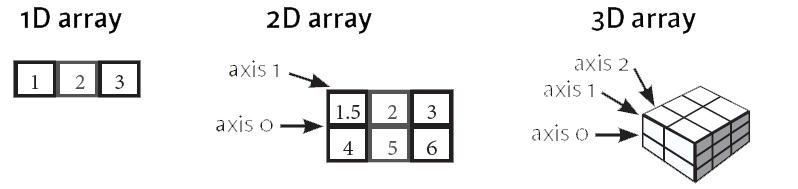

 [More information about data types](https://numpy.org/doc/stable/user/basics.types.html). Knowing about data types is important as using the wrong data type can cause overflow errors. Using correct data type is crucial in many cases when high precision numbers are needed (https://numpy.org/doc/stable/user/basics.types.html#overflow-errors)
 

 ## 1.2 Operations on Arrays
 Arithemetic operations on arrays are element-wise operations, while some other functions are not.

 ### a. Array creation:

In [ ]:
a = np.array([10, 20, 40])
b = np.array([[1, 2, 3],
              [4, 5, 6]])

 The above will create 2 NumPy array. (For array b, notice the use of an extra pair of square brackets)

In [ ]:
print(f"a = {a}")

a = [10 20 40]


In [ ]:
print("b = ")
print(b)

b = 
[[1 2 3]
 [4 5 6]]


 There are many ways to create NumPy array. Check out the [documentations](https://numpy.org/doc/stable/user/basics.creation.html) for more 😄.

 ### b. Basic operations on NumPy array:

 Let's define some arrays:

In [ ]:
a = np.array([10, 20, 40])
b = np.random.random((3))
print(f'a = {a}')
print(f'b = {b}')

a = [10 20 40]
b = [0.27168768 0.6364923  0.1040313 ]


 Arithmetic operators are applied elementwise.

In [ ]:
print('a + b =', a + b)
print('a - b = ', a - b)
print('abs(b - a) = ', np.abs(b - a))
print('a < b =', a < b)

a + b = [10.27168768 20.6364923  40.1040313 ]
a - b =  [ 9.72831232 19.3635077  39.8959687 ]
abs(b - a) =  [ 9.72831232 19.3635077  39.8959687 ]
a < b = [False False False]


In [ ]:
a * b

array([ 2.71687676, 12.72984598,  4.16125212])

 **Note:** when operating on matrices, '*' operator is applied elementwise. If you needs to apply dot product between 2 matrices (say A and B), the correct syntax is
 ```python
 A.dot(B)
 ```
 or
 ```python
 np.dot(A, B)
 ```

 Unary operations

In [ ]:
a = np.array([10, 20, 30])
print(f"a = {a}")

a = [10 20 30]


In [ ]:
print('sin(a) =', np.sin(a))
print('sqrt(a) =', np.sqrt(a))
print('power(a, 3) =', np.power(a, 3))
print('sum(a) =', np.sum(a))
print('mean(a) =', np.mean(a))
print('min(a) = ', np.min(a))
print('max(a) = ', np.max(a))

sin(a) = [-0.54402111  0.91294525 -0.98803162]
sqrt(a) = [3.16227766 4.47213595 5.47722558]
power(a, 3) = [ 1000  8000 27000]
sum(a) = 60
mean(a) = 20.0
min(a) =  10
max(a) =  30


 Some of the above operations has alternative syntaxs.

In [ ]:
print('sum(a) =', a.sum())
print('mean(a) =', a.mean())
print('min(a) = ', a.min())
print('max(a) = ', a.max())

sum(a) = 60
mean(a) = 20.0
min(a) =  10
max(a) =  30


 **Question: Why above operations operate the way they do (element-by-element)?**
 This leads us to two important concepts: vectorization and broadcasting.
 According to [NumPy docs](https://numpy.org/doc/stable/user/whatisnumpy.html#why-is-numpy-fast):

 "Vectorization describes the absence of any explicit looping, indexing, etc., in the code - these things are taking place, of course, just “behind the scenes” in optimized, pre-compiled C code.

 Broadcasting is the term used to describe the implicit element-by-element behavior of operations; generally speaking, in NumPy all operations, not just arithmetic operations, but logical, bit-wise, functional, etc., behave in this implicit element-by-element fashion, i.e., they broadcast."- NumPy docs.

 ### c. Reshape an Array
 The shape of an array a can be changed by
 <ul>
     <li> a.shape = (): change the shape of 'a'
     <li> a.resize(): change the shape of 'a'
     <li> a.reshape(): the shape of 'a' does not change. It simply returns a new array with the given shape
 </ul>

In [ ]:
a = np.arange(24)
print('a =', a)
b = a.reshape(3, 8)
print()
print('After a.reshape(3, 8), b =')
print(b)

# calling reshape returns a new array but does not change the shape of the original array 
print()
print('After a.reshape(3, 8), a =')
print(a)

print()
a.shape = (2, 12)
print('After a.shape = (2, 12), a =')
print(a)
a.resize(4, 6)

print()
print('After a.resize(4, 6), a =')
print(a)

a = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

After a.reshape(3, 8), b =
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]

After a.reshape(3, 8), a =
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

After a.shape = (2, 12), a =
[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]]

After a.resize(4, 6), a =
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


**Note:** I found a very [interesting post](https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r) on stackoverflow that gives some insight into how shape works in NumPy. If you really want to get technical on how NumPy works, check out [NumPy internals](https://docs.scipy.org/doc/numpy/reference/internals.html).  
**Warning ⚠️ :** Go check out "[Guide to NumPy](http://web.mit.edu/dvp/Public/numpybook.pdf)" if you are so excited about NumPy. 

 ## 1.3 Exercise   Minkowski Distance
 Let $X = [x_{1}, x_2, ..., x_n)$ and $Y = [y_1, y_2, ..., y_n]$. Then the Minkowski distnace of order p between X and Y is $D(X, Y) = (|x_1-y_1|^p + |x_2 - y_2|^p + ... + |x_n -y_n|^p)^{1/p}$

 When $p=1$, this is the Manhattan distance.

 When $p=2$, this is the Euclidian distance.

 Complete the following function to calculate the Minkowski distance.

In [ ]:
def distance(x: np.ndarray, y: np.ndarray, p: int) -> float:
    # complete the function
    return 0
    # end of the distance() function


x = np.array([1, 2, 3], np.int8)
y = np.array([2, 3, 4], np.int8)
print(f'x = {x}, y = {y}\n')

p1 = 1.0
print(f'p1 = {p1}')
print(f'xy_p1_distance = {distance(x, y, p1)}')
print(f'yx_p1_distance = {distance(x, y, p1)}\n')

p2 = 2.0
print(f'p2 = {p2}')
print(f'xy_p1_distance = {distance(x, y, p2)}')
print(f'yx_p1_distance = {distance(x, y, p2)}')

x = [1 2 3], y = [2 3 4]

p1 = 1.0
xy_p1_distance = 0
yx_p1_distance = 0

p2 = 2.0
xy_p1_distance = 0
yx_p1_distance = 0


In [ ]:
# this is a solution to the exercise above
def distance(x, y, p):
    distance = pow(
        np.sum(np.power(np.abs(x.astype('float') - y.astype('float')), p)), 1/p)
    return distance


x = np.array([1, 2, 3], np.uint8)
y = np.array([2, 3, 4], np.uint8)
p = 1
xy_p1_distance = distance(x, y, p)
yx_p1_distance = distance(y, x, p)
print('x = {}'.format(x))
print('y = {}'.format(y))
print('p = {}, xy_p1_distance = {}'.format(p, xy_p1_distance))
print('p = {}, yx_p1_distance = {}\n'.format(p, yx_p1_distance))

p = 2
xy_p1_distance = distance(x, y, p)
yx_p1_distance = distance(y, x, p)
print('x = {}'.format(x))
print('y = {}'.format(y))
print('p = {}, xy_p1_distance = {}'.format(p, xy_p1_distance))
print('p = {}, yx_p1_distance = {}'.format(p, yx_p1_distance))

x = [1 2 3]
y = [2 3 4]
p = 1, xy_p1_distance = 3.0
p = 1, yx_p1_distance = 3.0

x = [1 2 3]
y = [2 3 4]
p = 2, xy_p1_distance = 1.7320508075688772
p = 2, yx_p1_distance = 1.7320508075688772


 ## 1.4 Array Indexing, Slicing and Iterating

 #### 1.4.1 Indexing

 a. One-dimensional array
 - One-dimensional array is very **similar** to python lists
 - Array elements can be refered to by their indices. Also, array index start at 0

In [ ]:
a = np.array([0, 1, 2, 3, 4, 5])
print(f'a = {a}')

a = [0 1 2 3 4 5]


In [ ]:
for i in range(0, a.size):
    print(f"a[{i}] = {a[i]}")

a[0] = 0
a[1] = 1
a[2] = 2
a[3] = 3
a[4] = 4
a[5] = 5


 b. Multi-dimensional array
 - Element can be indexed given indices for each axis

In [ ]:
b = np.fromfunction(lambda x, y: 10*x + y, (4, 4), dtype=int)
print("b = ")
print(b)

print(f"\nb[2,3] = {b[2,3]}")
print(f"b[0:4, 0] = {b[0:4, 0]}")

b = 
[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]]

b[2,3] = 23
b[0:4, 0] = [ 0 10 20 30]


### 1.4.2 Slicing
 Slicing operation is very similar to regular python list. We just need to consider each axis in turn.
 If you omit any values, NumPy will use default values.
 For example, consider below example, since we omit both starting and ending indices along the first axis, the default values will be used.

In [ ]:
print("The next line is equivalent to b[0:4, 0]")
print(f"b[:, 0] = {b[ : , 0]}")

The next line is equivalent to b[0:4, 0]
b[:, 0] = [ 0 10 20 30]


 Missing axis indices will be considered as complete slices
 For example, the below example omit the second axis.

In [ ]:
print(f"b[3] = {b[3]}")
print(f"This is equivalent to b[3,:] = {b[3,:]}")

b[3] = [30 31 32 33]
This is equivalent to b[3,:] = [30 31 32 33]


 You can find more examples below

In [ ]:
a = np.arange(10)
print('a =', a)
print('a[0] =', a[0])
print('a[:9: =]', a[:9:])
#a[end] is not included in a[start:end:1]
print('a[:10: =]', a[:10:])
a[0] = 5
print('a =', a)
#print('a[10] =', a[10])
b = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10]])
print('\nb =\n', b)
print('b[1, 3] =', b[1, 3])
print('b[1, ::2] =', b[1, ::2])
print('b[1, :4:2] =', b[1, :4:2])
print('b[1, 1:4:2] =', b[1, 1:4:2])
# slicing: start:end --exclude end but include start
# extended slicing  start:end:step

a = [0 1 2 3 4 5 6 7 8 9]
a[0] = 0
a[:9: =] [0 1 2 3 4 5 6 7 8]
a[:10: =] [0 1 2 3 4 5 6 7 8 9]
a = [5 1 2 3 4 5 6 7 8 9]

b =
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
b[1, 3] = 9
b[1, ::2] = [ 6  8 10]
b[1, :4:2] = [6 8]
b[1, 1:4:2] = [7 9]


 ## 1.5 Array of Zeros, Ones
 a. Zeros Array

In [ ]:
zeros = np.zeros((8, 8), dtype=int)
zeros

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

 b. Ones array

In [ ]:
ones = np.ones((8, 8), dtype=int)
ones

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

 c. Array with random elements
 You can generate an array filled with random floats in the half-open interval [0.0, 1.0).

In [ ]:
random_nums = np.random.random((2, 2))
random_nums

array([[0.22396255, 0.83205825],
       [0.37194493, 0.43270117]])

 Sometimes it is useful to have a sequence of repeatable/predicatble random numbers. The function random.seed(x) tells random.random() function to generate a sequence of random numbers with seed of x. That is, whenever random.seed(x) is called, the following random numbers generated from random.random() are the same.

In [ ]:
np.random.seed(5)
np.set_printoptions(precision=2)
print('Now the random seed is set to 5. Whenver the seed is set to 5, the sequence of random numbers from random.random() should be the same')
a = np.random.random((2, 3))
print('random array a =\n', a)
b = np.random.random((2, 3))
print('random array b =\n', b)
np.random.seed(5)
print("Now the random seed is reset to 5. The random numbers generated from random.random() should be repeated as above/")
a = np.random.random((2, 3))
print('random array a =\n', a)
b = np.random.random((2, 3))
print('random array b =\n', b)
np.random.seed(4)
print("Now the random seed is reset to 4. The random numbers generated from random.random() should not be the same as above/")
a = np.random.random((2, 3))
print('random array a =\n', a)
b = np.random.random((2, 3))
print('random array b =\n', b)

Now the random seed is set to 5. Whenver the seed is set to 5, the sequence of random numbers from random.random() should be the same
random array a =
 [[0.22 0.87 0.21]
 [0.92 0.49 0.61]]
random array b =
 [[0.77 0.52 0.3 ]
 [0.19 0.08 0.74]]
Now the random seed is reset to 5. The random numbers generated from random.random() should be repeated as above/
random array a =
 [[0.22 0.87 0.21]
 [0.92 0.49 0.61]]
random array b =
 [[0.77 0.52 0.3 ]
 [0.19 0.08 0.74]]
Now the random seed is reset to 4. The random numbers generated from random.random() should not be the same as above/
random array a =
 [[0.97 0.55 0.97]
 [0.71 0.7  0.22]]
random array b =
 [[0.98 0.01 0.25]
 [0.43 0.78 0.2 ]]


 Example to create a 8x8 matrix and fill it with a checkerboard pattern
 from http://www.labri.fr/perso/nrougier/teaching/numpy.100/

In [ ]:
Z = np.zeros((8, 8), dtype=int)
print('z =')
print(Z)
Z[1::2, :] = 1
print('\nAfter first slicing:')
print(Z)

Z[:, ::2] = 1
print('\nAfter second slicing:')
print(Z)

Z[1::2, ::2] = 1
print('\nAfter third slicing:')
print(Z)

Z[1::2, 0::2] = 0
print("\nAfter the last slicing:")
print(Z)

z =
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]

After first slicing:
[[0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]]

After second slicing:
[[1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]]

After third slicing:
[[1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]]

After the last slicing:
[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


 The result in a more attractive form

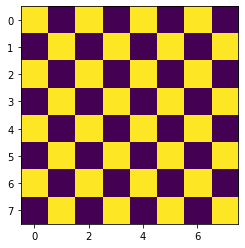

In [ ]:
plt.imshow(Z.astype(int))

## 1.6 Exercise: Create a 12x12 array with 1 on the border and 0 inside

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


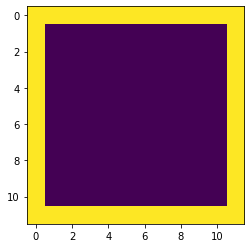

In [ ]:
# This is a solution to the exercise above

# create a 12x12 array of ones
a = np.ones((12, 12))
print(a)
# set the elements in the middle to 0
a[1:a.shape[0] - 1, 1:a.shape[1]-1] = 0
print()
print(a)
# display the array
# Show the above matrix as a checker board
plt.imshow(a.astype(int))

 ## 1.7 Array of Numbers in a Sequence
 <ul>
     <li>arange(start, end, step): return evenly spaced values within a given interval [start, end). step size determine the increment between an element and its predecessor.
     <li>linspace(start, end, num_elements): creates an array of start, start + step, start + 2 * step, ... where step = (end - start) / num_elements. Note that the end number maybe included.
     <li> Due to finite floating point precision, it is difficult to predict the number of elements for arange. Avoid to use arange when step is not an integer.
 </ul>

In [ ]:
a = np.arange(1, 10, 2)
print('a =')
print(a)
print('a.size = {}'.format(a.size))

b = np.linspace(1.0, 5.0, 9)
print('b =')
print(b)
print('b.size = {}'.format(b.size))

a =
[1 3 5 7 9]
a.size = 5
b =
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
b.size = 9


 ## 1.8 Axis Paramters in Functions
 Functions may take axis as a parameter. Now let's understand how the axis parameter works for np.sum().

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print("a = ")
print(a)

# sum the array elements by column
# 'axis = 0'
sum_by_axis_zero = np.sum(a, axis=0)
print(f'\nSum_by_axis_zero = {sum_by_axis_zero}\n')

# sum the array elements by row
sum_by_axis_one = np.sum(a, axis=1)
print(f'Sum_by_axis_one = {sum_by_axis_one}\n')

# sum all the array elements
print(f'Sum of all elements = {np.sum(a)}\n')

a = 
[[1 2 3]
 [4 5 6]]

Sum_by_axis_zero = [5 7 9]

Sum_by_axis_one = [ 6 15]

Sum of all elements = 21



In [ ]:
# Now let's see how the axis parameter works for np.apply_along_axis():
# the function takes the slicing along the specified axis parameter
#  numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)
def distance(x, y, p):
    distance = pow(
        np.sum(np.power(np.abs(x.astype('int') - y.astype('int')), p)), 1/p)
    return distance


x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x.shape)
print('x = ')
print(x)

y = np.ones(3)
print(f'\ny = {y}')

p = 1
z = np.apply_along_axis(distance, 1, x, y=y, p=p)
print(f'\nApply distance function on dimension 1 of x: z = {z}')

z = np.apply_along_axis(distance, 0, x, y=y, p=p)
print(f'\nApply distance function on dimension 0 of x: z = {z}')

print("\nNow let's compare some slicings")
print(f'\nx[:,1] = {x[:, 1]}')

print(f'\nx[:2] = \n{x[:2]}')

print(f'\nx[:2,:] = \n{x[:2, :]}')

print(f'\nx[:,:1] = \n{x[:, :1]}')

print(f'\nx[:,:2] = \n{x[:, :2]}')

(3, 3)
x = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

y = [1. 1. 1.]

Apply distance function on dimension 1 of x: z = [ 3. 12. 21.]

Apply distance function on dimension 0 of x: z = [ 9. 12. 15.]

Now let's compare some slicings

x[:,1] = [2 5 8]

x[:2] = 
[[1 2 3]
 [4 5 6]]

x[:2,:] = 
[[1 2 3]
 [4 5 6]]

x[:,:1] = 
[[1]
 [4]
 [7]]

x[:,:2] = 
[[1 2]
 [4 5]
 [7 8]]


 ## 1.10 Array Indexes: Boolean Indexes
 Booleans can be used in an array of indexes to select elements from an array x.
 <ul>
     <li> The array of indexes b should have the same shape of array x.
     <li> An element of array a is selected by x[b] if its corresponding boolean value in b is True.
 </ul>

In [ ]:
a = np.random.random(12).reshape(3, 4)
print('a =')
print(a)
b = a > 0.5
print('\nb =')
print(b)
print(f'\na[b] = {a[b]}')

print(f'a[b].shape = {a[b].shape}')
print('a[b].ndim = ', a[b].ndim)

a[b] = 1
print(f'\nAfter a[b] = 1')
print('a =')
print(a)

a =
[[0.86 0.98 0.16 0.6 ]
 [0.01 0.39 0.04 0.96]
 [0.44 0.95 0.79 0.87]]

b =
[[ True  True False  True]
 [False False False  True]
 [False  True  True  True]]

a[b] = [0.86 0.98 0.6  0.96 0.95 0.79 0.87]
a[b].shape = (7,)
a[b].ndim =  1

After a[b] = 1
a =
[[1.   1.   0.16 1.  ]
 [0.01 0.39 0.04 1.  ]
 [0.44 1.   1.   1.  ]]


## 1.11 Monte Carlo Estimation of Pi
For more information about Monte Carlo method, check out [this link](https://academo.org/demos/estimating-pi-monte-carlo/). The following example uses NumPy to estimate the value of pi.

In [ ]:
NUM_POINTS = 2000000
point = np.random.random((NUM_POINTS, 2))
point_index = np.sqrt(point[:, 0]**2 + point[:, 1]**2) < 1
print(f"Indices of points within the circle = {point_index}")
print(f"Value of pi = {4 * len(point[point_index == True])/NUM_POINTS}")

Indices of points within the circle = [ True  True  True ...  True  True False]
Value of pi = 3.141658


 ## 1.12 Exercise: Negate Array Elements

In [ ]:
a = np.random.randint(10, size=(5, 5))
print('Before negation, a =')
print(a)

Before negation, a =
[[1 6 0 2 0]
 [2 3 0 0 8]
 [9 7 2 9 8]
 [4 0 3 9 3]
 [1 6 2 6 3]]


 Write a program to negate elements of array a which are between 4 and 6 (including 4 and 6)

In [ ]:
# This is a solution to the exercise above
a = np.random.randint(10, size=(5, 5))
print('Before negation, a =')
print(a)

# write a program to negatve elements of array a which are between 4 and 6
b = a[(3 < a) * (a < 7)]
print('\nBoolean index array b =', b)
a[(3 < a) & (a < 7)] *= -1
print('After negation, a =')
print(a)

Before negation, a =
[[8 5 4 7 5]
 [8 6 3 8 1]
 [1 4 0 1 0]
 [9 4 9 7 5]
 [8 1 3 6 3]]

Boolean index array b = [5 4 5 6 4 4 5 6]
After negation, a =
[[ 8 -5 -4  7 -5]
 [ 8 -6  3  8  1]
 [ 1 -4  0  1  0]
 [ 9 -4  9  7 -5]
 [ 8  1  3 -6  3]]


 ## 1.13 Array of indexes for One Dimensional Array
 For a one dimensional array a, an array of indexes from array a can be used to select elements from array to form a new array such that
 <ul>
     <li> Each element in the array of indexes is an index of array a.
     <li> The new array b has the same shape as the array of indexes.
 </ul>

In [ ]:
a = np.arange(12) + 10
print('a =', a)
array_indexes = np.array([0, 0, 3, 4, 3])
print('a[array_indexes] =', a[array_indexes])
array_indexes = np.array([[0, 0, 2], [1, 3, 4]])
print('array_indexes = ')
print(array_indexes)
print('To show that the new array has the same shape as the array of indexes')
print('a[array_indexes] =')
print(a[array_indexes])

a = [10 11 12 13 14 15 16 17 18 19 20 21]
a[array_indexes] = [10 10 13 14 13]
array_indexes = 
[[0 0 2]
 [1 3 4]]
To show that the new array has the same shape as the array of indexes
a[array_indexes] =
[[10 10 12]
 [11 13 14]]


**Note:** We can index into multi-dimensional arrays with index arrays too. However, this situation does not come very often. If you are interested, please check [this link](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html)

 ## 1.14 Array Assignment: No Copy
 Recall that assignments such as 'a = b' makes a reference to the same object as b refers to. Think of this as giving **b** array an alias called **a**

In [ ]:
a = np.arange(12)
b = a
print('a =', a)
print('b =', b)

b.shape = (3, 4)
print('After reshaping b to (3, 4)')
print('a =\n', a)
print("Changing the shape of b also changed the shape of a.")

a = [ 0  1  2  3  4  5  6  7  8  9 10 11]
b = [ 0  1  2  3  4  5  6  7  8  9 10 11]
After reshaping b to (3, 4)
a =
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Changing the shape of b also changed the shape of a.


 ## 1.15 Array Copy: Deep Copy
 For an array a, 'a.copy()' creates a new stand-alone array object.

In [ ]:
a = np.arange(12)
b = a.copy()
print('a =', a)
print('b =', b)

b.shape = (3, 4)
print('After reshaping b to (3, 4)')
print('a =\n', a)
print("Notice that changing the shape of b does not change the shape of a.")

a = [ 0  1  2  3  4  5  6  7  8  9 10 11]
b = [ 0  1  2  3  4  5  6  7  8  9 10 11]
After reshaping b to (3, 4)
a =
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
Notice that changing the shape of b does not change the shape of a.


 # 2 Matplotlib
## 2.0 Introduction:

Matplotlib is a python 2D plotting library. It
 <ul>
     <li> Produces publication quality figures.
     <li> Generates plots, histograms, power spectra, bar charts, etc.
     <ul>
          <li> The pyplot interface of matplotlib provides a Matlab-like interface.
          <li> Full control of line styles, font properties, etc. are provided via an object oriented inteface or a set of functions.
          <li> Toolkits are availabe: basemap, cartopy, mplot3d, seaboar, ggplot, etc.
     </ul>
 </ul>

<strong>Bonus: looking statistical data visualization library. Check out <a href="https://seaborn.pydata.org/">Seaborn</a></strong> which is built on top of matplotlib.

## 2.1 Basic Components
![Components of Matplotlib figure](https://matplotlib.org/_images/anatomy.png)

*Highly recommend:* [Matplotlib Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

 ## 2.1 Figures
 A figure contains plot elements: plot, label, legend, etc.
 <ul>
     <li> The matplotlib.figure module provides full control of figures.
    <li> Keeps track of children axes.
 </ul>
 There is a module in matplotlib called pyplot that provides a collection of functions which work like **MATLAB**.

 ### 2.1.1 Axes
 The name is confusion but this can be think of as our plots.
 <ul>
  <li> belong to only 1 figure object.
  <li> contains two or more <strong>axis</strong> object (x axis, y axis, etc.). 
 </ul>

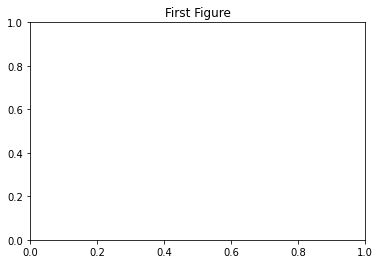

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()      # create an empty figure
plt.title('First Figure')  # put a title on the new empty figure
plt.show()            # display the figure

 ## 2.2 Plotting Data
 We will mainly focus on matplotlib.pyplot ([documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)) state-based interface. This should be sufficient for simple plots. 
 
The pyplot.plot() functions plots lines and/or markers to the current figure.

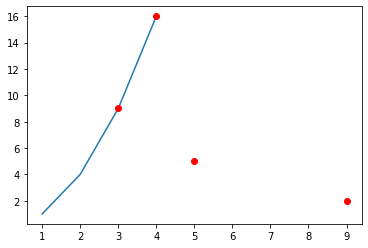

In [ ]:
# draw lines for the input data x and y
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
# draw markers (red o) for the input data x and y
plt.plot([3, 4, 5, 9], [9, 16, 5, 2], 'ro') 
plt.show()

'ro' is a format string in this case. The letters and symbols are from MATLAB. 

You can also specify the scale of x and y axes.

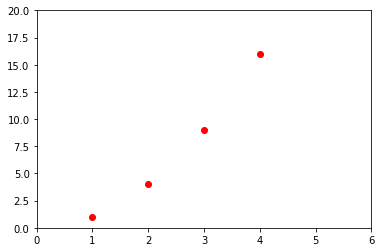

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')

# specify the axes in the form of [xmin, xmax, ymin, ymax]
plt.axis([0, 6, 0, 20])
plt.show()

You can plots several lines using only one *plot()* command. You just need to specify your lines one by one.

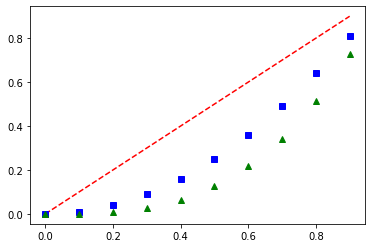

In [ ]:
t = np.arange(0, 1, 0.1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

You can also customize your lines using other parameters. Checkout the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html) for details.

 ## 2.3 Multiple Figures
 Multiple figures can be created and plotted.

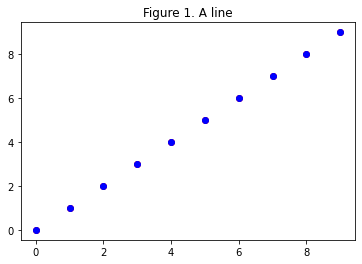

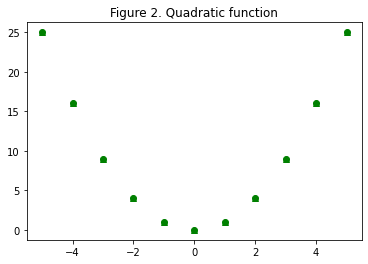

In [ ]:
plt.clf()
t = np.arange(0, 10)
plt.plot(t, t, 'ro')
plt.title("Figure 1. A line")

plt.figure()      # create a second figure
plt.title("Figure 2. Quadratic function")
x = np.arange(-5, 6)
plt.plot(x, x**2, 'g^')

# you can also add more things to your figures by selecting them using their
# indices
plt.figure(1)   # select the first figure to plot data
plt.plot(t,t, 'bo')
plt.figure(2)   # select the second figure to plot data
plt.plot(x, x**2, 'go')
plt.show()

## 2.4 Additional properties


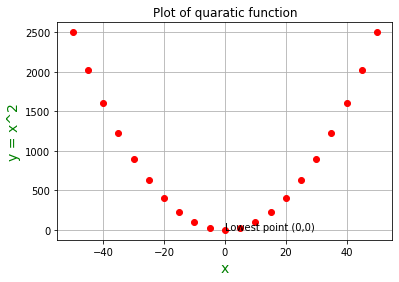

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-50, 51, 5)
y = x**2
plt.plot(x, y, 'ro')

# specify plot information, axes, title
plt.xlabel('x', fontsize=14, color='green')
plt.ylabel('y = x^2', fontsize=14, color='green')
plt.title('Plot of quaratic function')

# add some text
plt.text(0, 0, "Lowest point (0,0)")

# add a grid if you want
plt.grid(True)

plt.show()

 #### Legends
 The pyplot.legend() adds a legend to a figure.

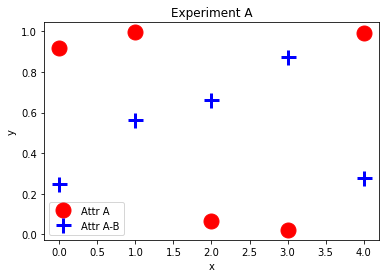

In [ ]:
z = np.random.random(10)
red_dot, = plt.plot(z[5:], "ro", markersize=15, label="Attr A")
blue_cross, = plt.plot(z[:5], "b+", markeredgewidth=3, markersize=15, label="Attr A-B")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Experiment A")
plt.show()


 ## 2.5 Mandelrot Set

This example was taken from scipy-lectures.org. Follow this [link](https://scipy-lectures.org/intro/numpy/auto_examples/plot_mandelbrot.html) for more information

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


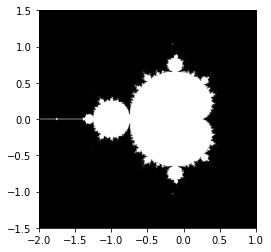

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()

### Additional examples
The below example was taken from [Contour plot of irregular spaced data](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py). It is one of many fancy examples on Matplotlib website. For more of them, see [the gallery](https://matplotlib.org/3.1.1/gallery/index.html)

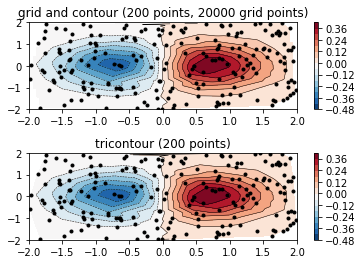

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')


ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))


# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

# 3 Scipy
Scipy is a collection of mathematical algorithms and functions build on NumPy. It is organized into subpackages covering variuos computing domains:
 <ul>
     <li> Cluster: clustering algorithms
     <li> Ftppack: fast Fourier Transform routinges
     <li> Linalg: linear algebra
     <li> Optimzie: optimization and root-finding routines
     <li> Sparse: sparse matrices and associated routines
     <li> and more ...
 </ul>
 For a complete and thorough introduction to SciPy, visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html). You can also find tutorial on SciPy at https://docs.scipy.org/doc/scipy/reference/#tutorial

## 3.1 Scipy Linear Algebra
 Sicpy.linalg provides all functions in numpy.linalg, plus some other more advanced functions. [documentation](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)
 <ul>
     <li> Scipy.linalg is preferred unless you do not want the dependency on scipy which requires a Fortran compiler since it is a warpping of Fortran LAPACK using f2py.
     <li> Scipy.linalg is always compiled with BLAS/LAPACK support (faster), while this is optional for numpy.
     <li> All of the BLAS/LAPACK functions are available to use in scipy.
 </ul>
 For example, scipy.linalg.solve(A, b) (faster than linalg.inv(A).dot(b)) can be used to solve the following equations:<br>
 ```
  x + 3y = 10
 2x + 5y = 20
 ```

In [ ]:
from scipy import linalg
A = np.array([
    [1, 3], 
    [2, 5]
])

b = np.array([
    [10], 
    [20]
])

print('A =')
print(A)
print('\nb =')
print(b)
print('\nThe solution of the equations Ax=b is linalg.solve(A, b) =')
print(linalg.solve(A, b))

A =
[[1 3]
 [2 5]]

b =
[[10]
 [20]]

The solution of the equations Ax=b is linalg.solve(A, b) =
[[10.]
 [ 0.]]


**Example:** Compute the determinant of square matrix. 

In [ ]:
from scipy import linalg
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
determinant = linalg.det(a)

print(f"a = \n{a}\n")
print(f"Determinant of a = {determinant}")

a = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Determinant of a = 0.0


**Example**: Compute matrix inverse

In [ ]:
A = np.array([
    [1,2],
    [3,4]
])

print(f"A = \n{a}\n")

A_inverse = linalg.inv(A)
print(f"A_inverse = \n{A_inverse}\n")

print("Let's verify the result by calculating A dot A_inverse")
I = A.dot(A_inverse)
print(f"A dot A_inverse = \n{np.floor(I)}")

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

A_inverse = 
[[-2.   1. ]
 [ 1.5 -0.5]]

Let's verify the result by calculating A dot A_inverse
A dot A_inverse = 
[[1. 0.]
 [0. 0.]]


## 3.2 More
There are many more aspects and tools provided by Scipy, please refer to https://docs.scipy.org/doc/scipy/reference/#tutorial for more materials.

 # 4 Errors in Scientific Computing

 ## 4.1 Precision for Floating Point Numbers
 A floating point number is stored with finite bits in a computer
 <ul>
     <li>A single-precision floating point number is stored as 32 bits
     <li>A double-precision floating point number is stored as 64 bits
     <li>A floating point number normally is not displayed accurately. It is displayed with fewer digits for better readability.
 <ul>

In [ ]:
a = np.arange(7.8, 8.4, 0.05)
print(a)
print('a[12] is actually', '{0:.55f}'.format(a[12]))

[7.8  7.85 7.9  7.95 8.   8.05 8.1  8.15 8.2  8.25 8.3  8.35 8.4 ]
a[12] is actually 8.3999999999999985789145284797996282577514648437500000000


 ## 4.2 Error for Comparing Floating Point Numbers
 The result may surprise you when two floating point numbers are compared

In [ ]:
print(0.1 + 0.1 + 0.1 == 0.3)
print('0.1 is actually stored as', '{0:.55f}'.format(0.1))
print('0.3 is actually stored as', '{0:.55f}'.format(0.3))
print('0.1 + 0.1 + 0.1 is actually stored as',
      '{0:.55f}'.format(0.1 + 0.1 + 0.1))

False
0.1 is actually stored as 0.1000000000000000055511151231257827021181583404541015625
0.3 is actually stored as 0.2999999999999999888977697537484345957636833190917968750
0.1 + 0.1 + 0.1 is actually stored as 0.3000000000000000444089209850062616169452667236328125000


 How to handle issues like this?

 This cannot be covered in this course. More study on numeric computation is needed. A simple approach is to claim that 0.1 + 0.1 + 0.1 == 0.3 is True if abs(0.1 + 0.1 + 0.1 - 0.3) < epsilon (a small number, e.g., 0.000001). Numpy provides a function allclose() to check whether two numbers/arrays are close eough to be considered equal.

In [ ]:
np.allclose(0.1+0.1+0.1, 0.3)

True

 # Additional Materials
 <ul>
     <li> <a href="https://numba.pydata.org/">Numba</a>: "Numba is an open source JIT compiler that translates a subset of Python and NumPy code into fast machine code." - In English: Numba helps make your Python and NumPy code run faster (in many cases).
     <li> <a href="https://cupy.dev/">CuPy</a>: "A NumPy-compatible array library accelerated by CUDA" - NumPy like library that is accelerated by NVIDIA CUDA.
     <li> <a href="https://github.com/jrjohansson/scientific-python-lectures">Scientific Python Lectures</a> 
 </ul>